## Easy MLFlow

In [2]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression



train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data.info()

In [ ]:
train_data.isnull().sum()

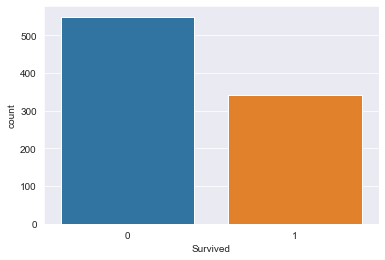

In [5]:
sns.countplot(x="Survived", data=train_data);

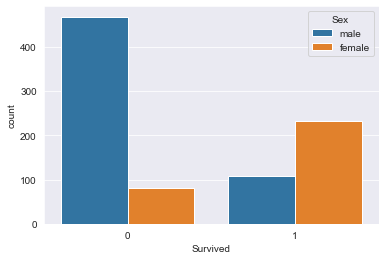

In [4]:
sns.countplot(x="Survived", hue="Sex", data=train_data);

In [6]:
features = ["Sex", "Pclass", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

train_data.drop(["Sex", "Pclass", "SibSp", "Parch", "Name"], axis=1, inplace=True)
test_data.drop(["Sex", "Pclass", "SibSp", "Parch", "Name"], axis=1, inplace=True)

train_df = train_data[['Fare']].join(X)
test_df = test_data[['Fare']].join(X_test)

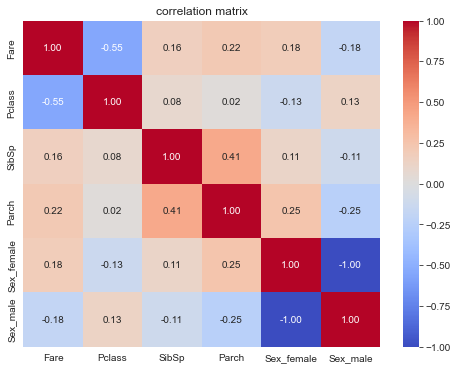

In [7]:
# Calculating the correlation matrix
corr_matrix = train_df.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("correlation matrix")
plt.show()

In [ ]:
y = train_data["Survived"]

In [ ]:
# Connect to the MLflow server
mlflow.set_tracking_uri("http://127.0.0.1:8080")
# Let's fix the current name of the experiment
embeddings_experiment = mlflow.set_experiment("Titanic")
# Fix the name of the current launch; if you don’t fix it, it will be auto-generated
tf_idf_run_name = "RFC"

with mlflow.start_run(run_name=tf_idf_run_name) as run:
    mlflow.sklearn.autolog()
    model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
    model.fit(train_df, y) 

In [ ]:
mlflow.set_tracking_uri("http://127.0.0.1:8080")
embeddings_experiment = mlflow.set_experiment("Titanic")
tf_idf_run_name = "LinR"

with mlflow.start_run(run_name=tf_idf_run_name) as run:
    mlflow.sklearn.autolog()
    model_lr = LinearRegression()
    model_lr.fit(train_df, y)

In [ ]:
mlflow.set_tracking_uri("http://127.0.0.1:8080")
embeddings_experiment = mlflow.set_experiment("Titanic")
tf_idf_run_name = "logR"

with mlflow.start_run(run_name=tf_idf_run_name) as run:
    mlflow.sklearn.autolog()
    model_lr = LogisticRegression()
    model_lr.fit(train_df, y)